In [1]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
import os
import imp
import matplotlib.pyplot as plt
import sys
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

## Theorical Values

In [431]:
def bandwidth(wavelength, response, number_of_points):
    ##number_of_points = Number_of_iteration/2
    for i in range(number_of_points):
        if response[number_of_points - i]>0.001 and response[number_of_points - (i+1)] < 0.001: ##-30 dB
            min_index = number_of_points - i
            break
        
    for j in range(number_of_points):
        if response[number_of_points + j]>0.001 and response[number_of_points + (j+1)] < 0.001: ##-330 dB
            max_index = number_of_points + j
            break

    return wavelength[min_index], wavelength[max_index]


In [432]:
def FWHM(wavelength, response):
    for i in range(len(wavelength)):
        if (10*np.log10(response[i])<-3 and 10*np.log10(response[i+1])>-3):
            min_index = i
            break
    
    for j in range(min_index,len(wavelength)):
        if (10*np.log10(response[j])>-3 and 10*np.log10(response[j+1])<-3):
            max_index = j
            break
    return wavelength[min_index], wavelength[max_index]

In [337]:
mode = lumapi.MODE(filename= 'Bragg.lms')

In [421]:
pi = np.pi
lambda_b = 1560e-9
neff = 2.257669
ng = 4.606681
bandwidth = 20e-9
w = 0.45e-6
delta_w = 0.05e-6
period = lambda_b/(2*neff)
N = 150
L = N*period
kappa = np.sqrt(bandwidth**2*pi**2*ng**2/lambda_b**4 - (pi/L)**2)
r_max = np.tanh(kappa*L)
delta_n = kappa*lambda_b/2
a_c = kappa*lambda_b/(np.pi) ## AC part of the induced index
print(period)
print(L)
print(kappa)
print(r_max)
print(delta_n)
print(a_c)

3.4548908630981784e-07
5.1823362946472676e-05
102328.89906986506
0.9999504700458737
0.07981654127449475
0.05081278833733651


In [422]:
mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set({"name":"guide1",
"x":0,
"x span":period/2,
"y":0,
"y span":w + delta_w,
"z":0,
"z span":0.22e-6,
"material":'Si (Silicon) - Palik'})

mode.addrect()
mode.set({"name":"guide2",
"x":period/4 + period/4,
"x span":period/2,
"y":0,
"y span":w - delta_w,
"z":0,
"z span":0.22e-6,
"material":'Si (Silicon) - Palik'})


mode.addrect()
mode.set({"name":"guide_before",
"x max":-period/4,
"x min":-period/4-0.5e-6,
"y":0,
"y span":w,
"z":0,
"z span":0.22e-6,
"material":'Si (Silicon) - Palik'})

mode.addrect()
mode.set({"name":"guide_after",
"x max":period/4 + period/4 + period/4 + 0.5e-6,
"x min":period/4 + period/4 + period/4,
"y":0,
"y span":w,
"z":0,
"z span":0.22e-6,
"material":'Si (Silicon) - Palik'})

mode.addrect()
mode.set({"name":"substrato",
"x":0,
"x span":2e-6,
"y":0,
"y span":2e-6,
"z min":-2.11e-6})
mode.setnamed("substrato","z min",-2.11e-6)
mode.setnamed("substrato","z max",-0.11e-6)
mode.setnamed("substrato","material","SiO2 (Glass) - Palik")

In [423]:
mode.switchtolayout()
mode.select("FDE")
mode.delete()
mode.select("mesh")
mode.delete()
mode.addfde()
mode.setnamed("FDE","solver type","2D X normal")
mode.set({"x":0,
"y":0,
"y span":3e-6,
"z":0,
"z span":3e-6,
"mesh cells y":150,
"mesh cells z":150})

mode.addmesh()
mode.set({"x":0,
"x span":0.1e-6,
"y":0,
"y span":0.6e-6,
"z":0,
"z span":0.3e-6})
mode.set({"override x mesh":0,
"dy":0.005e-6,
"dz":0.005e-6})

mode.addmesh()
mode.set({"x":period/4 + period/4,
"x span":0.1e-6,
"y":0,
"y span":0.6e-6,
"z":0,
"z span":0.3e-6})
mode.set({"override x mesh":0,
"dy":0.005e-6,
"dz":0.005e-6})

{!!}



C:\Program Files\Lumerical\v202\api\python\lumapi.py:138: UserWarning: Multiple objects named '::model::mesh'. Use of this object may give unexpected results.
  warnings.warn(message)


In [126]:
number_of_points = 10
neff_1 = np.zeros(number_of_points)
neff_2 = np.zeros(number_of_points)
dw = np.linspace(0, 0.08e-6, number_of_points)
for i in range(len(dw)):
    mode.switchtolayout()
    mode.setnamed("FDE","x",0)
    mode.setnamed("guide1","y span", w + dw[i])
    mode.findmodes()
    neff_1[i] = np.real(mode.getdata('FDE::data::mode1','neff'))

for j in range(len(dw)):
    mode.switchtolayout()
    mode.setnamed("FDE","x",period/4 + period/4)
    mode.setnamed("guide2","y span", w - dw[j])
    mode.findmodes()
    neff_2[j] = np.real(mode.getdata('FDE::data::mode1','neff'))

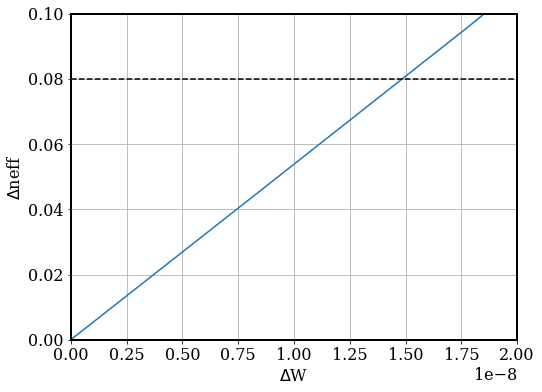

In [175]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
figure = plt.figure(figsize=(8,6))
plt.plot(dw, neff_1 - neff_2)
plt.axhline(y = delta_n, xmax = 1.5, linestyle = '--', color = "black")
plt.xlim([0, 2e-8])
plt.ylim([0, 0.1])
plt.xlabel("$\Delta$W")
plt.ylabel("$\Delta$neff")
plt.grid(True)

Text(0.5, 1.0, '$\\Delta$W = 14.8 nm')

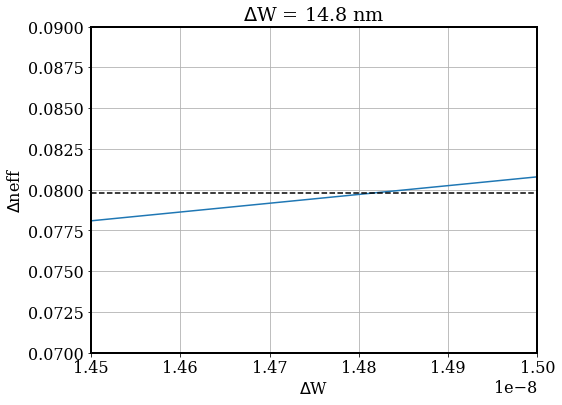

In [184]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
figure = plt.figure(figsize=(8,6))
plt.plot(dw, neff_1 - neff_2)
plt.axhline(y = delta_n, xmax = 1.5, linestyle = '--', color = "black")
plt.xlim([1.45e-8, 1.5e-8])
plt.ylim([0.07, 0.09])
plt.xlabel("$\Delta$W")
plt.ylabel("$\Delta$neff")
plt.grid(True)
plt.title("$\Delta$W = 14.8 nm")

In [424]:
mode.switchtolayout()
mode.setnamed("guide1","y span", w + 14.8e-9)
mode.setnamed("guide2","y span", w - 14.8e-9)


In [425]:
mode.switchtolayout()
mode.select("EME")
mode.delete()
mode.addeme()
mode.setnamed("EME","x min",-period/4-0.25e-6)
mode.set({"y":0,
"y span":2e-6,
"z":0,
"z span":2e-6})
#mode.set("allow custom eigensolver settings",1)
mode.set("number of cell groups",4) 
mode.set("number of modes for all cell groups", 10)
mode.set("group spans", np.transpose([0.25e-6, period/2,period/2,0.25e-6]))
mode.set({"y min bc":"PML",
"y max bc":"PML",
"z min bc":"PML",
"z max bc":"PML",
"mesh cells z":100,
"mesh cells y":100})


In [436]:
number_of_wavelength_points = 1000
mode.setemeanalysis("wavelength",1)
mode.setemeanalysis("start wavelength",lambda_b - 10e-9)
mode.setemeanalysis("stop wavelength",lambda_b + 10e-9)
mode.setemeanalysis("number of wavelength points",number_of_wavelength_points)
mode.emesweep('wavelength sweep')
response = mode.getemesweep("S_wavelength_sweep")
s_response = abs(response['s11']**2)
wavelength_response = response['wavelength']
band_nulls = bandwidth(wavelength_response,s_response,500)

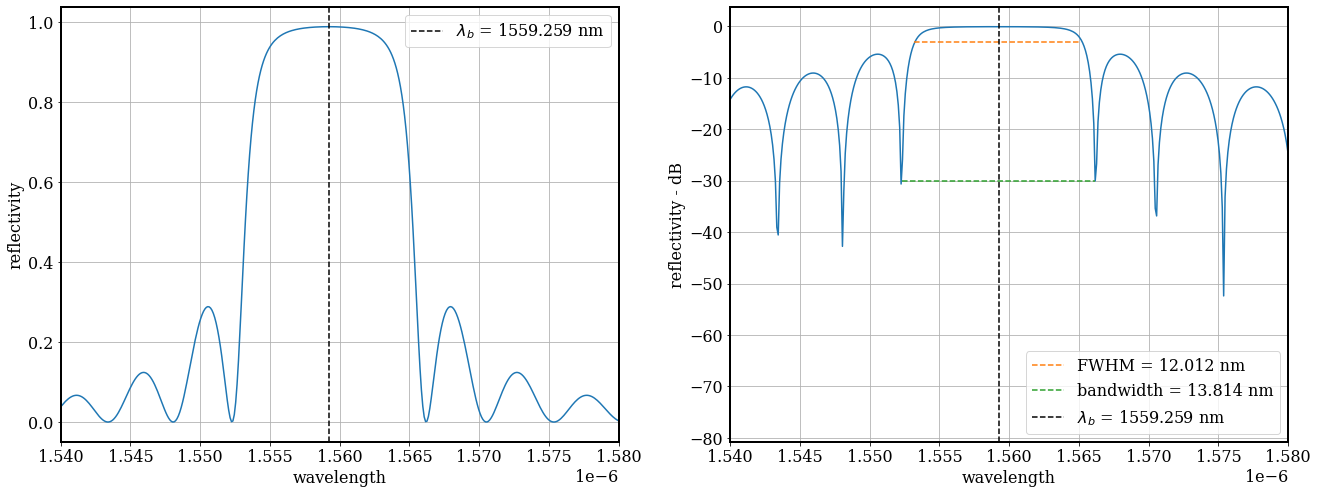

In [437]:
mode.setemeanalysis("start wavelength",1500e-9)
mode.setemeanalysis("stop wavelength",1600e-9)
mode.emesweep('wavelength sweep')
S_parameters = mode.getemesweep("S_wavelength_sweep")
s11= abs(S_parameters['s11']**2)
wavelength = S_parameters['wavelength']

peak = find_peaks(s11, height=0.5)
peak_pos = wavelength[peak[0]]
band = FWHM(wavelength, s11)
fwhm = band[1] - band[0]
bandwidth_null = band_nulls[1] - band_nulls[0]

figure, ax = plt.subplots(1, 2, figsize=(22,8))

plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength, s11)
ax[0].axvline(x = peak_pos, linestyle = '--',color = 'black', label ='$\lambda_b$ = ' + str(round(peak_pos[0][0]*1e9, 3))+" nm")
ax[0].set_xlim([1.54e-6, 1.58e-6])
#plt.ylim([0.07, 0.09])
ax[0].set_xlabel("wavelength")
ax[0].set_ylabel("reflectivity")
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength, 10*np.log10(s11))
ax[1].plot([band[0], band[1]], [-3, -3], '--', label = "FWHM = " + str(round(fwhm[0]*1e9, 3)) + ' nm')
ax[1].plot([band_nulls[0], band_nulls[1]], [-30, -30], '--', label = "bandwidth = " + str(round(bandwidth_null[0]*1e9, 3)) + ' nm')
ax[1].axvline(x = peak_pos, linestyle = '--',color = 'black', label ='$\lambda_b$ = ' + str(round(peak_pos[0][0]*1e9, 3))+" nm")
ax[1].set_xlim([1.54e-6, 1.58e-6])
#plt.ylim([0.07, 0.09])
ax[1].set_xlabel("wavelength")
ax[1].set_ylabel("reflectivity - dB")
ax[1].grid(True)
ax[1].legend(loc = 'lower right')

In [478]:
mode.switchtolayout()
number_of_iterations = 3
period_var = np.linspace(period - 5e-9, period + 5e-9, number_of_iterations)
lambda_brag = np.zeros(number_of_iterations)

for i in range(number_of_iterations):
    mode.switchtolayout()
    mode.setnamed("guide1","x span",period_var[i]/2)
    mode.setnamed('guide2','x',period_var[i]/4 + period_var[i]/4)
    mode.setnamed('guide2','x span',period_var[i]/2)
    mode.setnamed('guide_before','x min',-period_var[i]/4 - 0.5e-6)
    mode.setnamed('guide_before','x max',-period_var[i]/4)
    mode.setnamed('guide_after','x max',period_var[i]/4 + period_var[i]/4 + period_var[i]/4 + 0.5e-6)
    mode.setnamed('guide_after','x min',period_var[i]/4 + period_var[i]/4 + period_var[i]/4)
    mode.select('EME')
    mode.set("group spans", np.transpose([0.25e-6, period_var[i]/2,period_var[i]/2,0.25e-6]))
    mode.run()
    mode.setemeanalysis("start wavelength",1500e-9)
    mode.setemeanalysis("stop wavelength",1600e-9)
    mode.emesweep('wavelength sweep')
    S_parameters = mode.getemesweep("S_wavelength_sweep")
    s11= abs(S_parameters['s11']**2)
    wavelength = S_parameters['wavelength']
    peak = find_peaks(s11, height=0.5)
    peak_pos = wavelength[peak[0]]
    lambda_brag[i] = peak_pos[0][0]
    

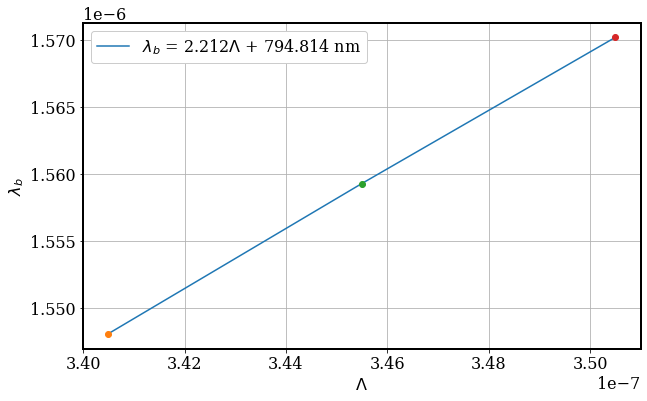

In [511]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
a = (lambda_brag[2] - lambda_brag[0])/(period_var[2] - period_var[0])
b = lambda_brag[0] - a*period_var[0]
plt.plot(period_var, lambda_brag, label = '$\lambda_b$ = ' + str(round(a, 3)) + '$\Lambda$' + ' + ' + str(round(b*1e9, 3)) + ' nm')
plt.plot(period_var[0],lambda_brag[0], 'o')
plt.plot(period_var[1],lambda_brag[1], 'o')
plt.plot(period_var[2],lambda_brag[2], 'o')
plt.xlabel('$\Lambda$')
plt.ylabel('$\lambda_b$')
plt.grid(True)
plt.legend(loc = 'upper left', framealpha = 1)